In [1]:
# checking gpu
!nvidia-smi

Tue Jul 25 07:19:27 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import  datetime
print(f'Notebook last run (end-to-end): {datetime.datetime.now()}')

Notebook last run (end-to-end): 2023-07-25 07:20:37.906273


In [3]:
# getting helper function
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-07-25 07:21:23--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-07-25 07:21:23 (96.9 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [5]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir

In [6]:
#downloading and getting data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip

--2023-07-25 07:25:12--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.162.128, 74.125.31.128, 108.177.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.162.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G  76.5MB/s    in 20s     

2023-07-25 07:25:33 (75.7 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [7]:
unzip_data('101_food_classes_10_percent.zip')

In [9]:
train_dir = '/content/101_food_classes_10_percent/train/'
test_dir = '/content/101_food_classes_10_percent/test/'

In [10]:
walk_through_dir('101_food_classes_10_percent')

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 101 directories and 0 images in '101_food_classes_10_percent/test'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/macaroni_and_cheese'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/onion_rings'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/deviled_eggs'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/macarons'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/pho'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/hot_dog'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/spaghetti_bolognese'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/chocolate_cake'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/frozen_yogurt'.
There are 0 directories and 250 im

In [11]:
# setup data inputs
import tensorflow as tf

IMAGE_SIZE=(224, 224)
train_data_all_10_percent=tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    label_mode='categorical',
    image_size=IMAGE_SIZE,
    batch_size=32
)
test_data_all_10_percent=tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    label_mode='categorical',
    image_size=IMAGE_SIZE,
    shuffle=False
)

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [17]:
# get class names
import pathlib
import numpy as np
data_dir=pathlib.Path(train_dir)
data_dir
class_names = np.array([item.name for item in data_dir.glob('*')])
class_names, len(class_names)

(array(['macaroni_and_cheese', 'onion_rings', 'deviled_eggs', 'macarons',
        'pho', 'hot_dog', 'spaghetti_bolognese', 'chocolate_cake',
        'frozen_yogurt', 'french_onion_soup', 'garlic_bread', 'cannoli',
        'chicken_curry', 'chicken_wings', 'steak', 'lobster_bisque',
        'fish_and_chips', 'hummus', 'ravioli', 'sashimi', 'pizza',
        'lobster_roll_sandwich', 'grilled_salmon', 'seaweed_salad',
        'croque_madame', 'takoyaki', 'cheesecake', 'churros', 'edamame',
        'french_fries', 'tacos', 'hot_and_sour_soup', 'caprese_salad',
        'risotto', 'panna_cotta', 'miso_soup', 'bread_pudding', 'poutine',
        'tiramisu', 'tuna_tartare', 'donuts', 'baklava', 'lasagna',
        'huevos_rancheros', 'prime_rib', 'bruschetta', 'beet_salad',
        'strawberry_shortcake', 'chicken_quesadilla', 'crab_cakes',
        'nachos', 'gnocchi', 'baby_back_ribs', 'beignets',
        'shrimp_and_grits', 'scallops', 'carrot_cake', 'escargots',
        'dumplings', 'creme_bru

In [20]:
train_data_all_10_percent.class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [21]:
train_data_all_10_percent.take(3)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 101), dtype=tf.float32, name=None))>

In [22]:
# create model checkpoint
checkpoint_path = '101_classes_10_percent_data_model_checkpoint'
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True
)

In [24]:
# data_augmentation
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

data_augmentation=Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),

], name='data_augmentaion')

In [33]:
# base_model
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
# Freeze the base model
base_model.trainable=False
#inputs
inputs=tf.keras.layers.Input(shape=(224, 224, 3), name='input_layer')
#data_augmentation
x=data_augmentation(inputs)
#input pass into base_model
x = base_model(x, training=False)
#pooling
x=tf.keras.layers.GlobalAveragePooling2D(name='pooling_layer')(x)
#outPut layer
outputs = tf.keras.layers.Dense(101, activation='softmax', name='output_layer')(x)
#model combined
model_1 = tf.keras.Model(inputs, outputs)


In [34]:
model_1.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentaion (Sequentia  multiple                 0         
 l)                                                              
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 pooling_layer (GlobalAverag  (None, 1280)             0         
 ePooling2D)                                                     
                                                                 
 output_layer (Dense)        (None, 101)               129381    
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-train

In [35]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_8 (Rescaling)        (None, None, None,   0           ['input_5[0][0]']                
                                3)                                                                
                                                                                                  
 normalization_4 (Normalization  (None, None, None,   7          ['rescaling_8[0][0]']            
 )                              3)                                                   

In [36]:
#compile
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [37]:
history_1 = model_1.fit(
    train_data_all_10_percent,
    epochs=5,
    validation_data=test_data_all_10_percent,
    validation_steps=int(0.15*len(test_data_all_10_percent)),
    callbacks=[checkpoint_callback]
)

Epoch 1/5
237/237 [==============================] - 119s 429ms/step - loss: 3.3669 - accuracy: 0.2752 - val_loss: 2.4325 - val_accuracy: 0.4542
Epoch 2/5
237/237 [==============================] - 76s 318ms/step - loss: 2.1956 - accuracy: 0.4980 - val_loss: 1.9942 - val_accuracy: 0.5225
Epoch 3/5
237/237 [==============================] - 66s 277ms/step - loss: 1.8146 - accuracy: 0.5677 - val_loss: 1.8362 - val_accuracy: 0.5312
Epoch 4/5
237/237 [==============================] - 60s 252ms/step - loss: 1.6040 - accuracy: 0.6133 - val_loss: 1.7344 - val_accuracy: 0.5583
Epoch 5/5
237/237 [==============================] - 58s 242ms/step - loss: 1.4454 - accuracy: 0.6481 - val_loss: 1.7150 - val_accuracy: 0.5593


In [38]:
model_1.evaluate(test_data_all_10_percent)

790/790 [==============================] - 69s 87ms/step - loss: 1.5835 - accuracy: 0.5838


[1.5835498571395874, 0.5838019847869873]

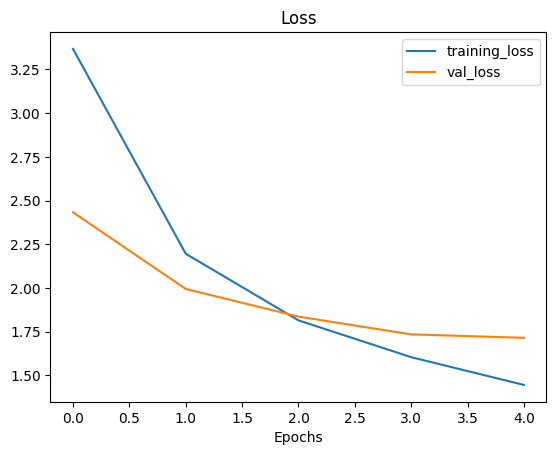

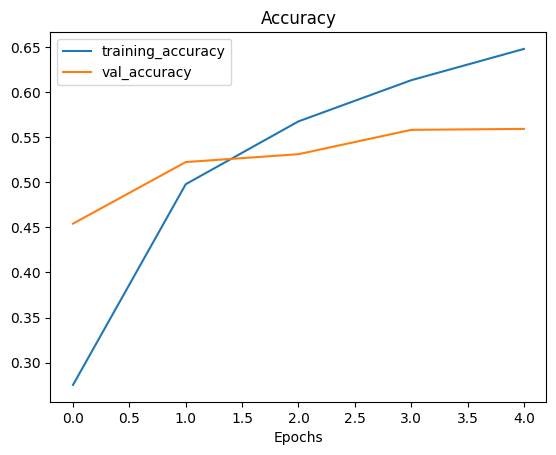

In [39]:
plot_loss_curves(history_1)

FineTuning

In [41]:
# unFreeze all layers
base_model.trainable=True
# Freeze except last 5
for layer in base_model.layers[:-5]:
  layer.trainable=False


In [42]:
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(0.0001),
                metrics=['accuracy'])

In [45]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_5 False
1 rescaling_8 False
2 normalization_4 False
3 rescaling_9 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [46]:
#fit for finetune
fine_tune_epochs=10
history_2=model_1.fit(
    train_data_all_10_percent,
    epochs=fine_tune_epochs,
    validation_data=test_data_all_10_percent,
    validation_steps=int(.25* len(test_data_all_10_percent)),
    initial_epoch=history_1.epoch[-1],
    callbacks=[checkpoint_callback]
)

Epoch 5/10
237/237 [==============================] - 75s 265ms/step - loss: 1.2108 - accuracy: 0.6826 - val_loss: 1.6364 - val_accuracy: 0.5593
Epoch 6/10
237/237 [==============================] - 60s 250ms/step - loss: 1.0949 - accuracy: 0.7085 - val_loss: 1.6156 - val_accuracy: 0.5631
Epoch 7/10
237/237 [==============================] - 60s 251ms/step - loss: 1.0128 - accuracy: 0.7262 - val_loss: 1.6139 - val_accuracy: 0.5666
Epoch 8/10
237/237 [==============================] - 60s 248ms/step - loss: 0.9484 - accuracy: 0.7456 - val_loss: 1.6357 - val_accuracy: 0.5623
Epoch 9/10
237/237 [==============================] - 51s 214ms/step - loss: 0.8915 - accuracy: 0.7609 - val_loss: 1.6195 - val_accuracy: 0.5658
Epoch 10/10
237/237 [==============================] - 56s 235ms/step - loss: 0.8240 - accuracy: 0.7787 - val_loss: 1.6033 - val_accuracy: 0.5685


In [47]:
model_1.evaluate(test_data_all_10_percent)

790/790 [==============================] - 71s 90ms/step - loss: 1.4971 - accuracy: 0.6027


[1.4970951080322266, 0.6027326583862305]

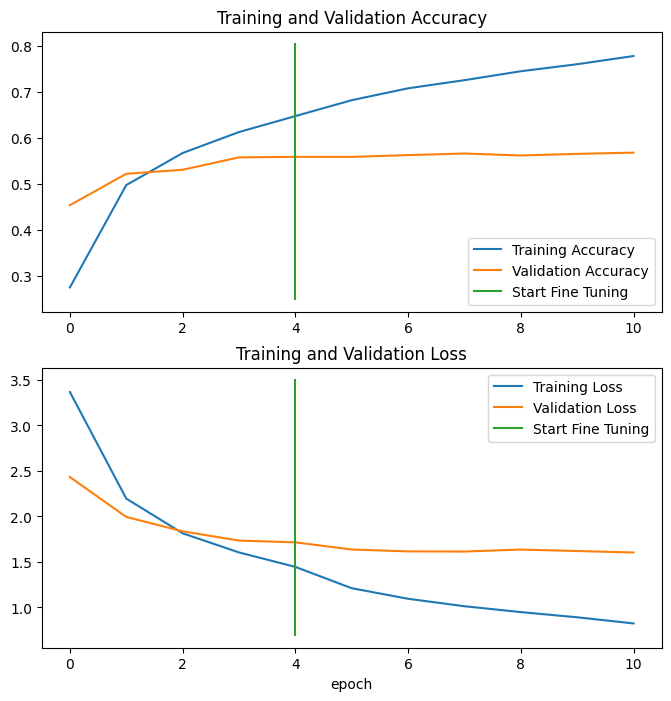

In [48]:
compare_historys(history_1, history_2, initial_epochs=5)

In [49]:
# more Finetuning
base_model.trainable=True,
for layer in base_model.layers[:-15]:
  layer.trainable=False

In [50]:
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(0.0001),
                metrics=['accuracy'])

In [51]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_5 False
1 rescaling_8 False
2 normalization_4 False
3 rescaling_9 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [53]:
initial_epochs=20 # 10 more
history_3 = model_1.fit(
    train_data_all_10_percent,
    epochs=initial_epochs,
    validation_data=test_data_all_10_percent,
    validation_steps=len(test_data_all_10_percent),
    initial_epoch=history_2.epoch[-1])

Epoch 10/20
237/237 [==============================] - 111s 420ms/step - loss: 0.7694 - accuracy: 0.7913 - val_loss: 1.5545 - val_accuracy: 0.5977
Epoch 11/20
237/237 [==============================] - 92s 386ms/step - loss: 0.6970 - accuracy: 0.8125 - val_loss: 1.5422 - val_accuracy: 0.6009
Epoch 12/20
237/237 [==============================] - 115s 485ms/step - loss: 0.6305 - accuracy: 0.8292 - val_loss: 1.5667 - val_accuracy: 0.5984
Epoch 13/20
237/237 [==============================] - 93s 391ms/step - loss: 0.5716 - accuracy: 0.8396 - val_loss: 1.5829 - val_accuracy: 0.6010
Epoch 14/20
237/237 [==============================] - 90s 378ms/step - loss: 0.5345 - accuracy: 0.8569 - val_loss: 1.5941 - val_accuracy: 0.5989
Epoch 15/20
237/237 [==============================] - 88s 371ms/step - loss: 0.4843 - accuracy: 0.8665 - val_loss: 1.6235 - val_accuracy: 0.5978
Epoch 16/20
237/237 [==============================] - 90s 379ms/step - loss: 0.4406 - accuracy: 0.8752 - val_loss: 1.6274

In [54]:
model_1.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentaion (Sequentia  multiple                 0         
 l)                                                              
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 pooling_layer (GlobalAverag  (None, 1280)             0         
 ePooling2D)                                                     
                                                                 
 output_layer (Dense)        (None, 101)               129381    
                                                                 
Total params: 4,178,952
Trainable params: 1,037,589
Non-tra

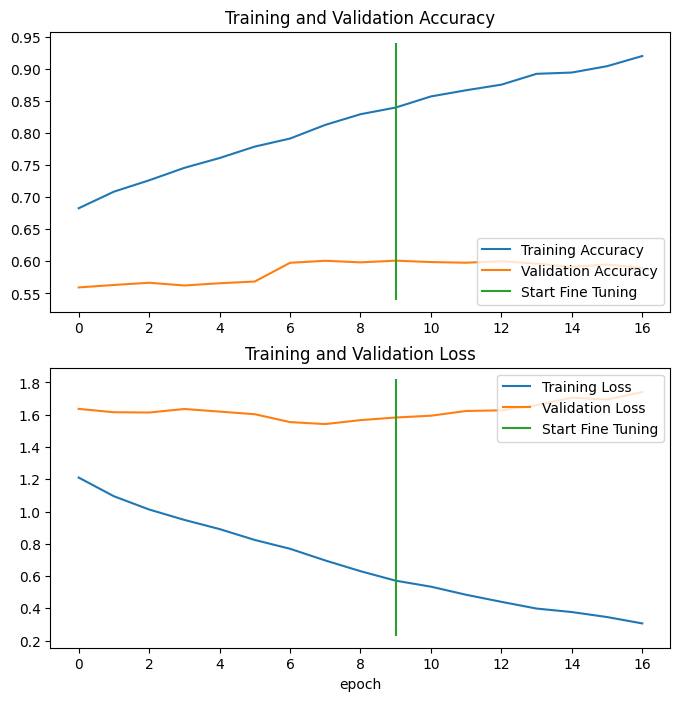

In [56]:
compare_historys(history_2, history_3, initial_epochs=10)

In [57]:
model_1.evaluate(test_data_all_10_percent)

790/790 [==============================] - 63s 79ms/step - loss: 1.7409 - accuracy: 0.5895


[1.7409136295318604, 0.5895445346832275]

If feautre extraction already works well, the improvements you see from fine-tuning may not be as great as if your dataset was significantly different from the data your base model was pre-trained on.

In [64]:
#save the model to drive
model_1.save('my_model.h5')

TypeError: ignored

In [63]:
tf.__version__

'2.12.0'

In [65]:
pred_probs = model_1.predict(test_data_all_10_percent, verbose=1) # set verbosity to see how long it will take

790/790 [==============================] - 71s 87ms/step


In [66]:
pred_probs

array([[4.37474459e-01, 3.97762051e-05, 1.72857687e-01, ...,
        1.67894626e-07, 5.51176374e-04, 3.73820961e-02],
       [9.98991191e-01, 3.27198663e-12, 3.22093433e-06, ...,
        7.21724864e-05, 3.40536765e-11, 2.82795942e-09],
       [6.03192806e-01, 2.86503155e-02, 5.53048030e-03, ...,
        4.86209974e-05, 1.82946369e-05, 1.84877089e-03],
       ...,
       [1.96580349e-05, 2.12087948e-02, 1.62560188e-08, ...,
        1.37134528e-04, 1.42323188e-04, 2.57494390e-01],
       [5.30118123e-03, 5.86500810e-03, 1.71097042e-03, ...,
        9.82137979e-04, 5.12435472e-05, 4.35873270e-01],
       [1.21671945e-01, 2.85177329e-03, 4.72064741e-04, ...,
        1.31601439e-04, 1.29932858e-04, 6.60097480e-01]], dtype=float32)

In [67]:
len(pred_probs)

25250

In [68]:
pred_probs.shape

(25250, 101)

In [69]:
# Get the class predicitons of each label
pred_classes = pred_probs.argmax(axis=1)

# How do they look?
pred_classes[:10]

array([ 0,  0,  0,  8,  8,  8, 29, 17,  0,  0])

In [71]:
# Note: This might take a minute or so due to unravelling 790 batches
y_labels = []
for images, labels in test_data_all_10_percent.unbatch(): # unbatch the test data and get images and labels
  y_labels.append(labels.numpy().argmax()) # append the index which has the largest value (labels are one-hot)
y_labels[:10] # check what they look like (unshuffled)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [72]:
# How many labels are there? (should be the same as how many prediction probabilities we have)
len(y_labels)

25250

In [73]:
# Get accuracy score by comparing predicted classes to ground truth labels
from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(y_labels, pred_classes)
sklearn_accuracy

0.5895445544554455

In [74]:
# We'll import our make_confusion_matrix function from https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/helper_functions.py
# But if you run it out of the box, it doesn't really work for 101 classes...
# the cell below adds a little functionality to make it readable.
from helper_functions import make_confusion_matrix

In [75]:

# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### Added: Rotate xticks for readability & increase font size (required due to such a large confusion matrix)
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

In [77]:
# Get the class names
class_names = test_data_all_10_percent.class_names
class_names[:10]



['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [78]:
# Plot a confusion matrix with all 25250 predictions, ground truth labels and 101 classes
make_confusion_matrix(y_true=y_labels,
                      y_pred=pred_classes,
                      classes=class_names,
                      figsize=(100, 100),
                      text_size=20,
                      norm=False,
                      savefig=True)

